# **OtterBots Group Project**

Data analysis on... blurb



---


## **Import Libraries**

In [14]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



---


## **Pre-Processing Data**



*   Create dataframes from the csv files
*   Fix any issues with the dataframes for use in this project

Source of the CSV files:

[Kaggle - Canine Intelligence and Size](https://www.kaggle.com/datasets/thedevastator/canine-intelligence-and-size?select=AKC+Breed+Info.csv)

[Github - akcdata by tmfilho](https://github.com/tmfilho/akcdata)


In [2]:
# URLs
breed_info_url="https://raw.githubusercontent.com/OtterBots/DoggieData/main/AKC_Breed_Info.csv"
intel_url = "https://raw.githubusercontent.com/OtterBots/DoggieData/main/dog_intelligence.csv"
groups_url = "https://raw.githubusercontent.com/OtterBots/DoggieData/main/akc-data-latest.csv"

In [3]:
# create dataframes
df1 = pd.read_csv(breed_info_url, index_col=0)
df2 = pd.read_csv(intel_url, index_col=0)
df3 = pd.read_csv(groups_url)

In [4]:
# fix column name for df3 keep only the columns we will use
df3.rename(columns={'Unnamed: 0': 'Breed'}, inplace=True)
df3 = df3[['Breed', 'group']]

*   Rename entries where a dog breed has many different spellings across the dataframes

In [5]:
# Fix different spellings of the same breed to increase useable entries

# Mismatched spelling of breeds that are affected by merger of df1 and df2 = dd
df1['Breed'] = df1['Breed'].str.replace('Airdale Terrier', 'Airedale Terrier')
df1['Breed'] = df1['Breed'].str.replace('Cocker Spaniel-American', 'Cocker Spaniel')
df1['Breed'] = df1['Breed'].str.replace('Cocker Spaniel-English', 'English Cocker Spaniel')
df1['Breed'] = df1['Breed'].str.replace('Collie \(Rough\) & \(Smooth\)', 'Collie')
df1['Breed'] = df1['Breed'].str.replace('Old English Sheepdog \(Bobtail\)', 'Old English Sheepdog')
df1['Breed'] = df1['Breed'].str.replace('Shetland Sheepdog \(Sheltie\)', 'Shetland Sheepdog')

df2['Breed'] = df2['Breed'].str.replace('Chinese Shar Pei', 'Chinese Shar-Pei')
df2['Breed'] = df2['Breed'].str.replace('Curly Coated Retriever', 'Curly-Coated Retriever')
df2['Breed'] = df2['Breed'].str.replace('Soft-coated Wheaten Terrier', 'Soft Coated Wheaten Terrier')

# Breeds affected by merger of dd and df3 = dd
df1['Breed'] = df1['Breed'].str.replace('Chinese Shar Pei', 'Chinese Shar-Pei')
df1['Breed'] = df1['Breed'].str.replace('Curly Coated Retriever', 'Curly-Coated Retriever')
df1['Breed'] = df1['Breed'].str.replace('Flat Coated Retriever', 'Flat-Coated Retriever')
df1['Breed'] = df1['Breed'].str.replace('Otter Hound', 'Otterhound')
df1['Breed'] = df1['Breed'].str.replace('Soft-Coated Wheaten Terrier', 'Soft Coated Wheaten Terrier')

# Breeds in that don't make an impact since they are not in df2
df1['Breed'] = df1['Breed'].str.replace('Anatolin Sheepdog', 'Anatolian Shepherd Dog')

<ipython-input-5-70ff234ee235>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['Breed'] = df1['Breed'].str.replace('Collie \(Rough\) & \(Smooth\)', 'Collie')
<ipython-input-5-70ff234ee235>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['Breed'] = df1['Breed'].str.replace('Old English Sheepdog \(Bobtail\)', 'Old English Sheepdog')
<ipython-input-5-70ff234ee235>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['Breed'] = df1['Breed'].str.replace('Shetland Sheepdog \(Sheltie\)', 'Shetland Sheepdog')


*   Merge dataframe on 'Breed' column

In [111]:
dd = pd.merge(df1,df2, on='Breed')
dd = pd.merge(dd, df3, on='Breed')



*   Replace all 'na', 'not found' to NaN



In [112]:
dd.replace({'na': 'not found'}, inplace=True)
dd.replace({'not found': np.nan}, inplace=True)



*   Drop entry ('Alaskan Malamute') because it is missing height and weight data



In [113]:
dd.dropna(subset=['height_low_inches'], inplace=True)
dd.reset_index(drop=True, inplace=True)



*   Convert height and weight columns to floats



In [114]:
dd['height_low_inches'] = dd['height_low_inches'].astype(str).astype(float)
dd['height_high_inches'] = dd['height_high_inches'].astype(str).astype(float)
dd['weight_low_lbs'] = dd['weight_low_lbs'].astype(str).astype(float)
dd['weight_high_lbs'] = dd['weight_high_lbs'].astype(str).astype(float)



*   Remove '%' from the 'obey' column
*   Convert 'obey' column to floats



In [117]:
# first remove the '%' character
dd['obey'] = dd['obey'].str.replace('%', '')

# then covert to float
dd['obey'] = dd['obey'].astype(float)

AttributeError: ignored

In [118]:
# View information of the datafame to be used
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Breed               113 non-null    object 
 1   height_low_inches   113 non-null    float64
 2   height_high_inches  113 non-null    float64
 3   weight_low_lbs      113 non-null    float64
 4   weight_high_lbs     113 non-null    float64
 5   Classification      113 non-null    object 
 6   obey                104 non-null    float64
 7   reps_lower          113 non-null    int64  
 8   reps_upper          113 non-null    int64  
 9   group               113 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 9.0+ KB


In [119]:
# locate the null entries in 'obey'
dd[dd['obey'].isnull()]

# **** what to do about the NaN ?????

,Breed,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,Classification,obey,reps_lower,reps_upper,group
2,Bloodhound,24.0,26.0,80.0,120.0,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,Hound Group
3,Borzoi,26.0,28.0,70.0,100.0,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,Hound Group
9,Mastiff,27.0,30.0,175.0,190.0,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,Working Group
14,Afghan Hound,25.0,27.0,50.0,60.0,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,Hound Group
44,Basset Hound,14.0,14.0,40.0,50.0,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,Hound Group
50,Chow Chow,19.0,22.0,45.0,55.0,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,Non-Sporting Group
77,Basenji,17.0,17.0,20.0,22.0,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,Hound Group
78,Beagle,13.0,16.0,18.0,30.0,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,Hound Group
97,Shih Tzu,8.0,11.0,9.0,16.0,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,Toy Group


### **Adding Features**


*   Average weight
*   Average height
*   Average reps
*   Height to weight ratio





In [120]:
dd['weight_avg'] = (dd['weight_high_lbs'] + dd['weight_low_lbs']) / 2
dd['height_avg'] = (dd['height_high_inches'] + dd['height_low_inches']) / 2
dd['reps_avg'] = (dd['reps_lower'] + dd['reps_upper']) / 2
dd['height_to_weight'] = dd['height_avg'] / dd['weight_avg']



---


## **Data Exploration**

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

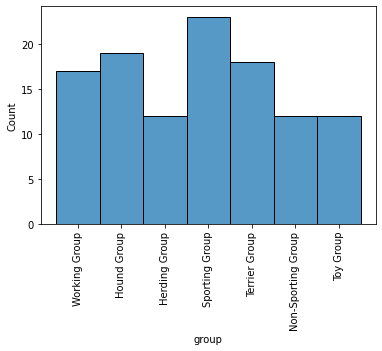

In [121]:
# Distribution of dog groups within the data
ax = sns.histplot(x='group', data=dd)
plt.xticks(rotation=90)

# Herding Group         12  10.62%
# Hound Group           19  16.81%
# Non-Sporting Group    12  10.62%
# Sporting Group        23  20.35%
# Terrier Group         18  15.93%
# Toy Group             12  10.62%
# Working Group         17  15.04%

#breed_count = dd.groupby('group').size()
#breed_perc = dd.groupby('group').size() / dd.shape[0]
#print(breed_count)
#print(breed_perc)

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

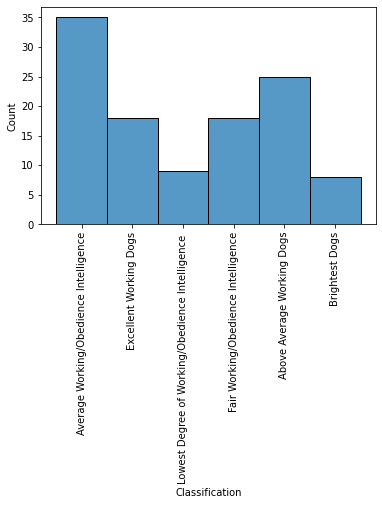

In [122]:
# Distribution of 'Classification'
ax = sns.histplot(x='Classification', data=dd)
plt.xticks(rotation=90)

# Above Average Working Dogs                          25  22.12%
# Average Working/Obedience Intelligence              35  30.98%
# Brightest Dogs                                       8   7.08%
# Excellent Working Dogs                              18  15.93%
# Fair Working/Obedience Intelligence                 18  15.93%
# Lowest Degree of Working/Obedience Intelligence      9   7.96%

#class_count = dd.groupby('Classification').size()
#class_perc = dd.groupby('Classification').size() / dd.shape[0]
#print(class_count)
#print(class_perc)

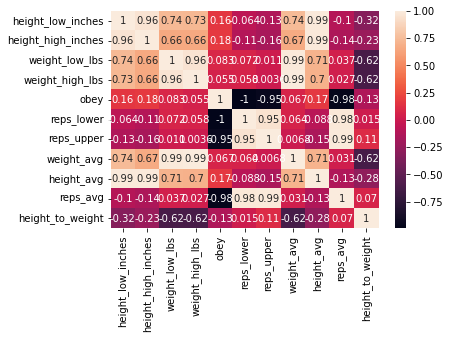

In [123]:
# Heatmap
dd_heatmap = dd
dd_heatmap = dd.drop(columns=['Breed', 'Classification', 'group'])

sns.heatmap(dd_heatmap.corr(), annot=True)

# There is high correlation between 'obey', 'reps_lower', 'reps_higher', and 'reps_avg' (which is the previous two average)
# What isn't seen on the heatmap is that 'Classification' is also highly correlated.
# We only need one of them for data exploration.

57.0
              Breed  height_avg
73           Vizsla        57.0
5        Great Dane        32.0
7   Irish Wolfhound        31.5


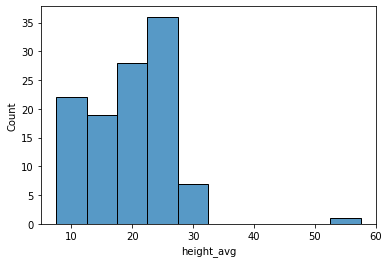

In [127]:
# What are the ranges of height around the average?

sns.histplot(x='height_avg', data=dd, binwidth=5)
print(dd['height_avg'].max())

dd_sorted = dd.sort_values(by='height_avg', ascending=False).head(3)

print(dd_sorted[['Breed', 'height_avg']])

# Great Danes and Irish Wolfhounds are some of the tallest breeds.
# A Vizsla is not almost double their height.  Thus it's height
# data is incorrect and the record should be dropped.

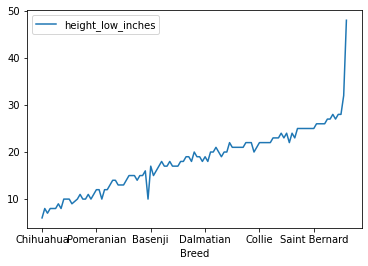

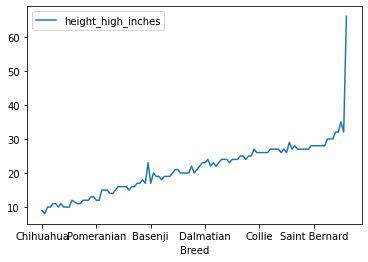

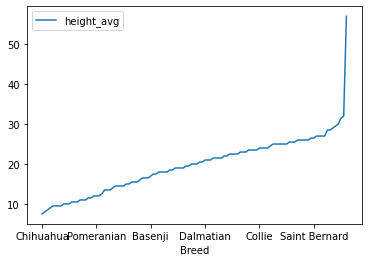

In [157]:
# Looking for oddities in the height data
dd_by_group = dd.sort_values(by='height_avg')

#add DataFrames to subplots
dd.plot(x='Breed', y='height_low_inches')
dd.plot(x='Breed', y='height_high_inches')
dd.plot(x='Breed', y='height_avg')
plt.show()

# Irish Water Spaniel has a low height of 10" but looking at the AKC website, it should be a low of 21
# this causes spikes in the plots when the data is sorted by the height_avg

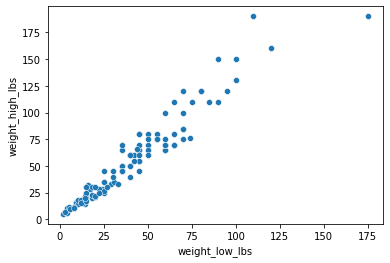

Breed                                       Saint Bernard
height_low_inches                                    25.0
height_high_inches                                   28.0
weight_low_lbs                                      110.0
weight_high_lbs                                     190.0
Classification        Fair Working/Obedience Intelligence
obey                                                 30.0
reps_lower                                             41
reps_upper                                             80
group                                       Working Group
weight_avg                                          150.0
height_avg                                           26.5
reps_avg                                             60.5
height_to_weight                                 0.176667
Name: 13, dtype: object
Breed                                                          Mastiff
height_low_inches                                                 27.0
height_high_inches    

In [207]:
# Looking for oddities in weight data
sns.scatterplot(x='weight_low_lbs', y='weight_high_lbs', data=dd)
plt.show()

print(dd.loc[dd['weight_high_lbs'].idxmax()])
# Max. high weight dog is the 'Saint Bernard'.

print(dd.loc[dd['weight_low_lbs'].idxmax()])
# Max. low weight dog is the 'Mastiff'.

print(dd.loc[dd['weight_avg'].idxmax()])
# Max. avg weight dog is the 'Mastiff'.

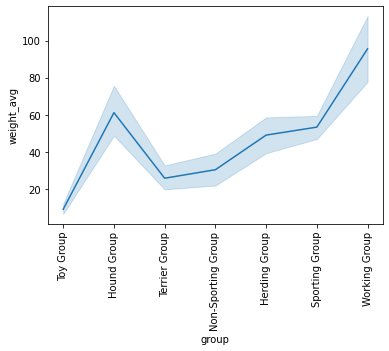

In [198]:
sns.lineplot(x='group', y='weight_avg', data=dd)
plt.xticks(rotation=90)
plt.show()

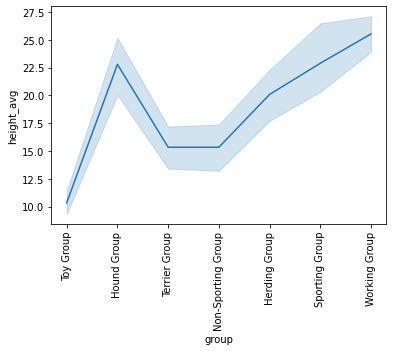

In [199]:
sns.lineplot(x='group', y='height_avg', data=dd)
plt.xticks(rotation=90)
plt.show()

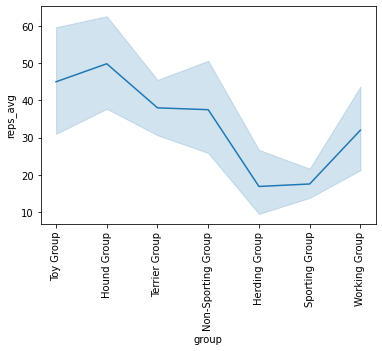

In [200]:
sns.lineplot(x='group', y='reps_avg', data=dd)
plt.xticks(rotation=90)
plt.show()

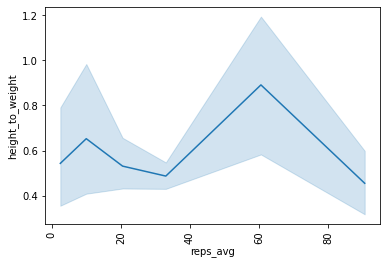

In [201]:
sns.lineplot(x='reps_avg', y='height_to_weight', data=dd)
plt.xticks(rotation=90)
plt.show()